In [ ]:
!pip install --upgrade pip
!pip install plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv("mexico-real-estate.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1736 non-null   int64  
 1   property_type  1736 non-null   object 
 2   state          1736 non-null   object 
 3   lat            1736 non-null   float64
 4   lon            1736 non-null   float64
 5   area_m2        1736 non-null   int64  
 6   price_usd      1736 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 95.1+ KB


In [ ]:
df.sample(5)

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
1084,1085,house,Estado de México,19.269808,-99.593781,238,197368.42
1649,1650,apartment,Distrito,19.382649,-99.143384,65,44178.77
934,935,house,Sonora,27.934649,-110.944010,134,57894.74
378,379,house,Guanajuato,20.583436,-101.198190,180,131747.44
372,373,house,Sinaloa,24.809065,-107.394012,212,112222.21


In [ ]:
df.shape

(1736, 7)

In [ ]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame.....
    lat=df["lat"],
    lon=df["lon"],
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=800,  # Width of map
    height=800,  # Height of map
    hover_data=["price_usd", "area_m2"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

NameError: name 'px' is not defined

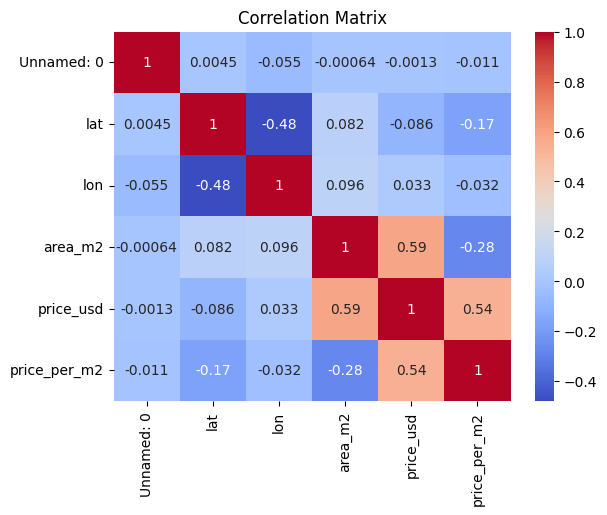

In [ ]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
df[["area_m2", "price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


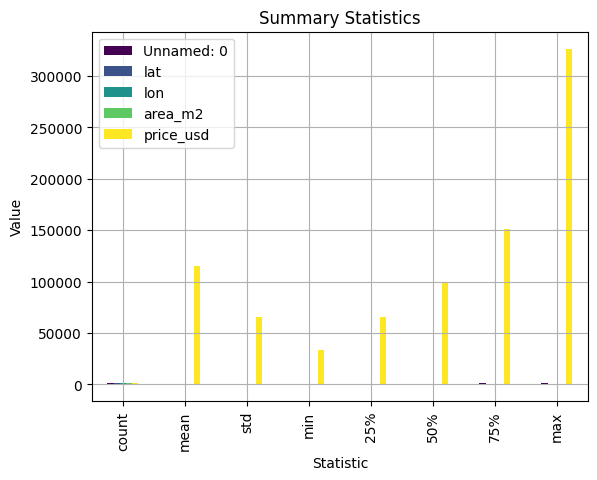

In [ ]:
sumry = df.describe()
sumry.plot(kind='bar', grid=True, colormap='viridis')
plt.title("Summary Statistics")
plt.ylabel("Value")
plt.xlabel("Statistic")

plt.show()

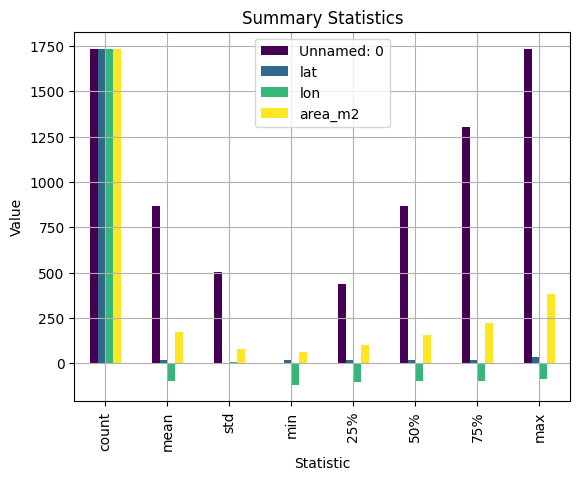

In [ ]:
sumry = df.drop(columns=["price_usd"]).describe()
sumry.plot(kind='bar', grid=True, colormap='viridis')
plt.title("Summary Statistics")
plt.ylabel("Value")
plt.xlabel("Statistic")

plt.show()

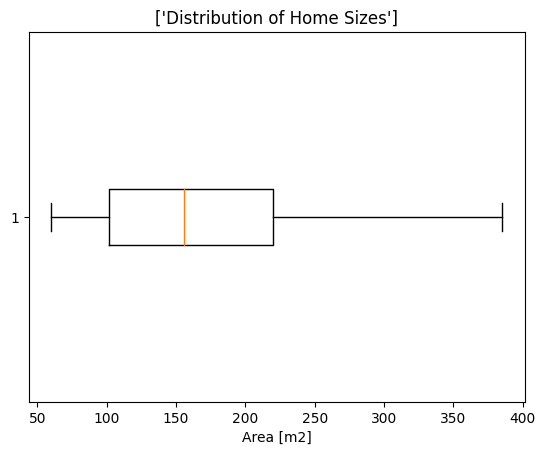

In [ ]:
plt.boxplot(df["area_m2"], vert=False)
plt.xlabel("Area [m2]")
plt.title(["Distribution of Home Sizes"]);

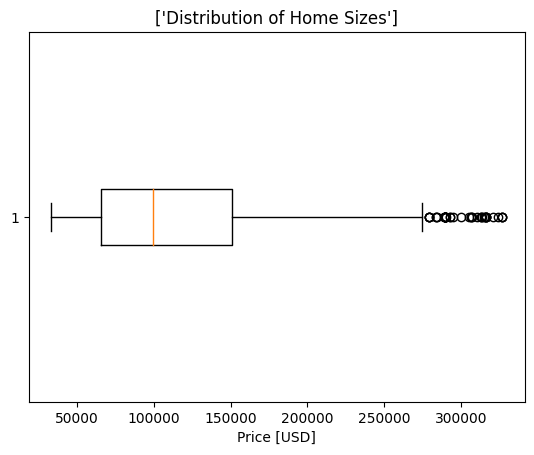

In [ ]:
plt.boxplot(df["price_usd"], vert=False)
plt.xlabel("Price [USD]")
plt.title(["Distribution of Home Sizes"]);

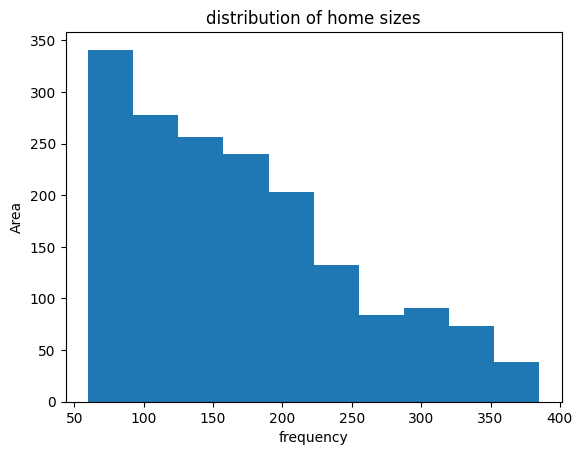

In [ ]:
plt.hist(df["area_m2"])
plt.xlabel("frequency")
plt.ylabel("Area")
plt.title("distribution of home sizes");


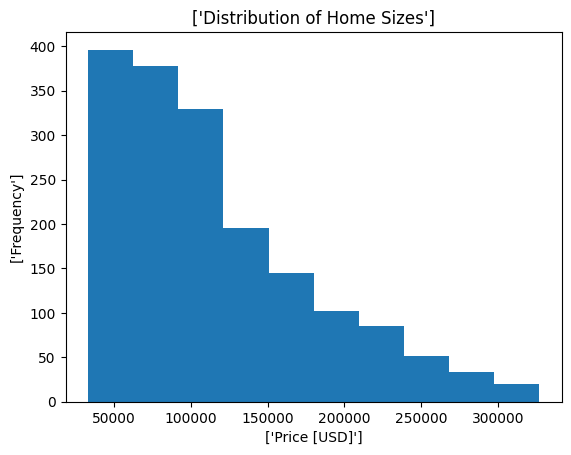

In [ ]:
plt.hist(df["price_usd"])
plt.xlabel(["Price [USD]"])
plt.ylabel(["Frequency"])
plt.title(["Distribution of Home Sizes"]);

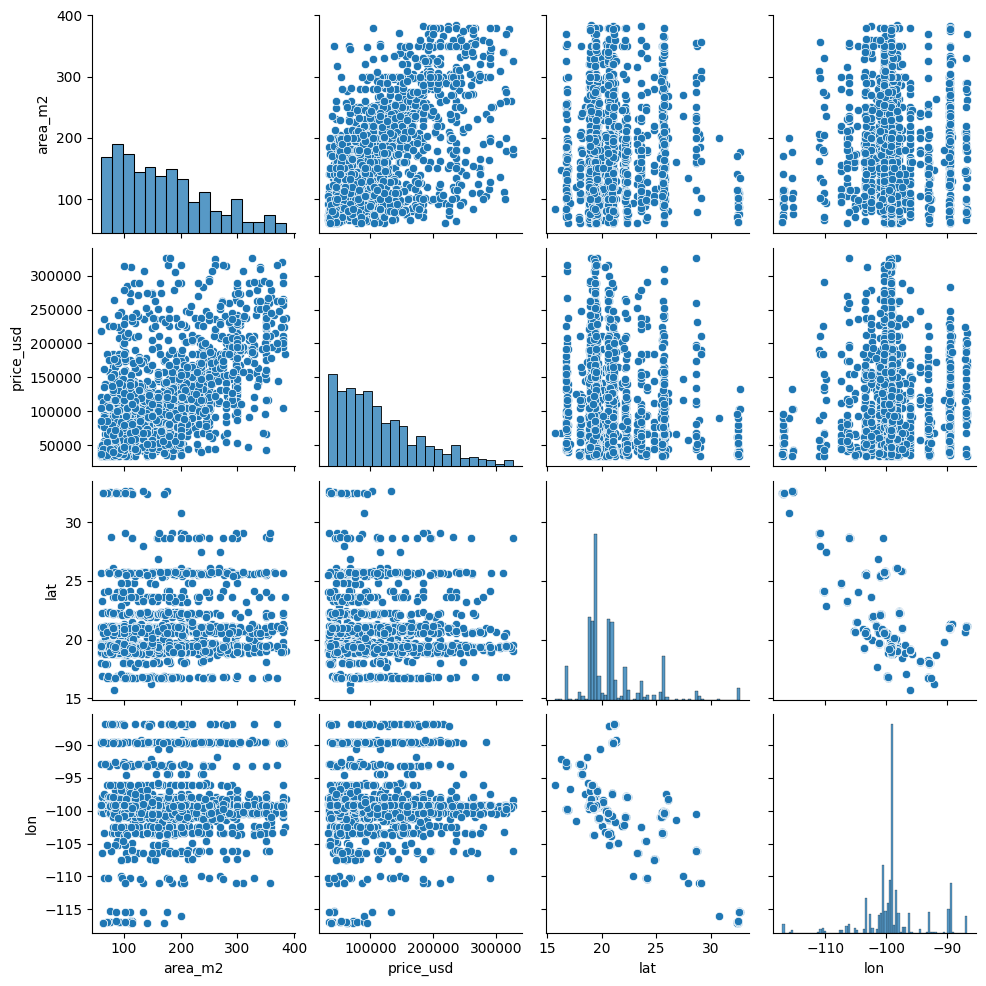

In [ ]:
sns.pairplot(df[["area_m2", "price_usd", "lat", "lon"]])
plt.show()


In [ ]:
df["property_type"].unique()

array(['house', 'apartment'], dtype=object)

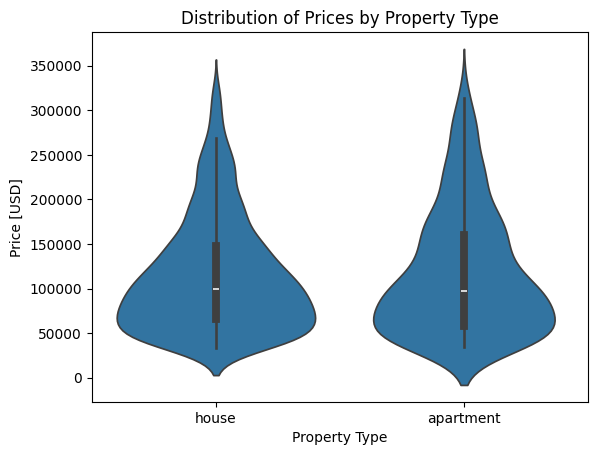

In [ ]:
sns.violinplot(x="property_type", y="price_usd", data=df)
plt.xlabel("Property Type")
plt.ylabel("Price [USD]")
plt.title("Distribution of Prices by Property Type")
plt.show()


In [ ]:
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
print(mean_price_by_state)

state
Nuevo                              158712.380000
Distrito Federal                   137953.803909
Querétaro                          133955.913281
Guanajuato                         133277.965833
Quintana Roo                       130142.436400
Chihuahua                          127073.852000
Estado de México                   124265.812202
Quintana                           124071.146154
Jalisco                            123386.472167
Campeche                           121734.633333
Puebla                             121732.974000
Estado                             120321.875286
Guerrero                           119854.276122
Sonora                             114547.883333
San                                113983.736250
Morelos                            112697.295625
Nuevo León                         112529.309623
Aguascalientes                     110543.888000
Distrito                           110493.610000
Yucatán                            108580.388596
Chiapas       

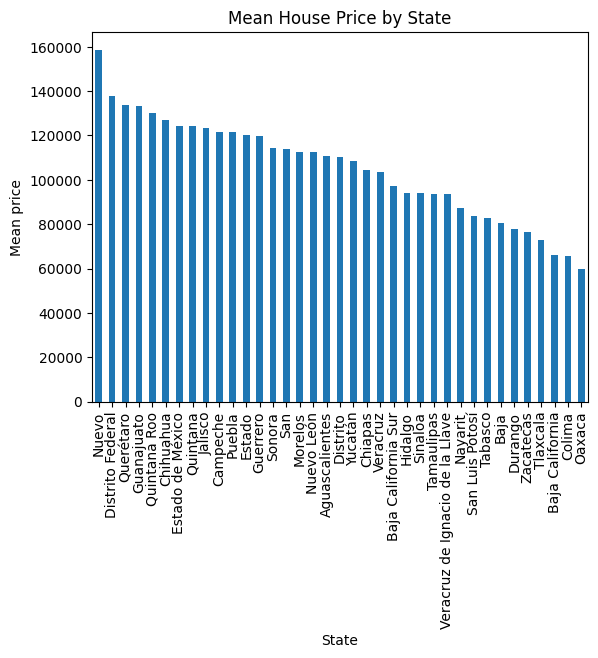

In [ ]:
mean_price_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel="Mean price",
    title="Mean House Price by State"
);

<ipython-input-127-d544d21e45af>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




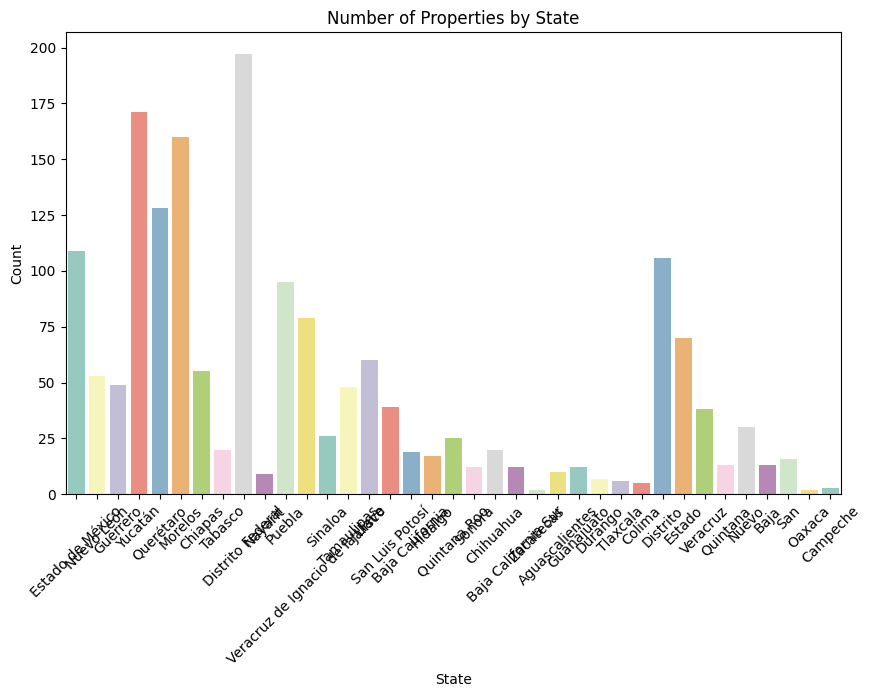

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="state", data=df, palette="Set3")
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Number of Properties by State")
plt.xticks(rotation=45)
plt.show();


In [ ]:
df["price_per_m2"] = df["price_usd"] / df["area_m2"]
df.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,1,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,2,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,3,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,4,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,5,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


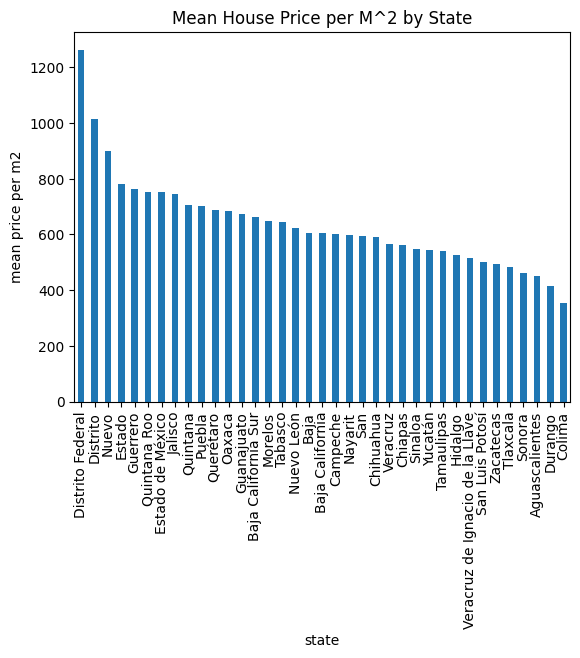

In [ ]:
Mean_House_Price_per_M2 = df.groupby("state")["price_per_m2"].mean().sort_values(ascending=False)
#print(Mean_House_Price_per_M2)
Mean_House_Price_per_M2.plot(
    kind="bar",
    xlabel="state",
    ylabel="mean price per m2",
    title="Mean House Price per M^2 by State"
);

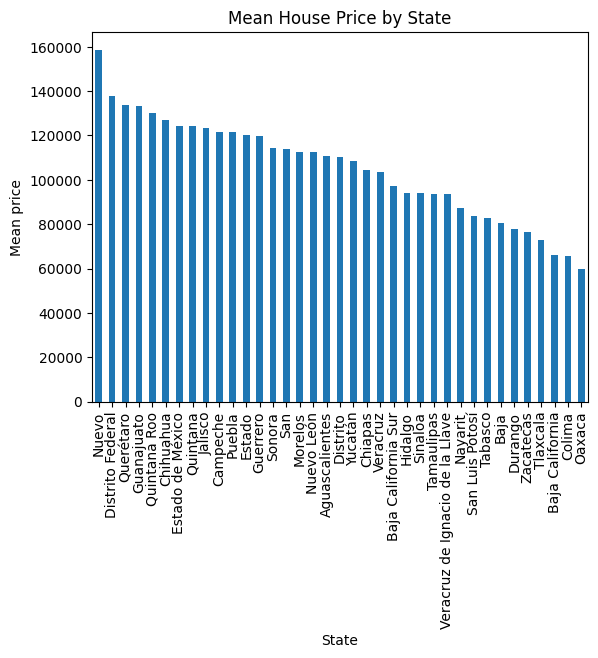

In [ ]:
mean_price_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel="Mean price",
    title="Mean House Price by State"
);

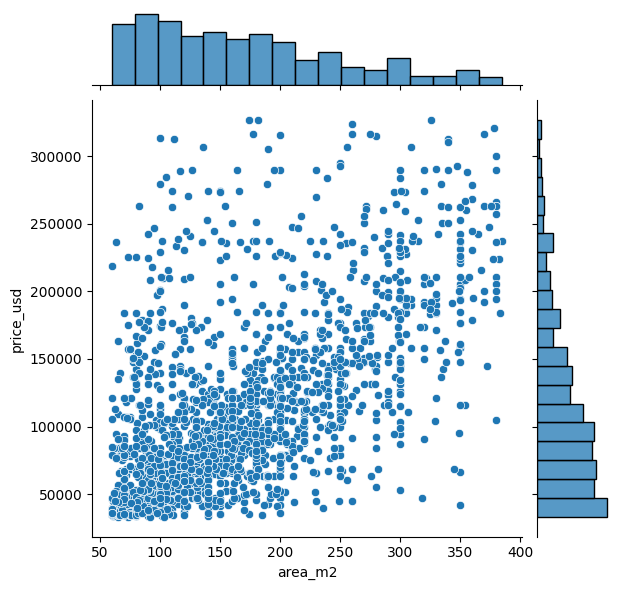

In [ ]:
sns.jointplot(x="area_m2", y="price_usd", data=df, kind="scatter")
plt.show()

In [ ]:
p_correlation = df["area_m2"].corr(df["price_usd"])
print(p_correlation)

0.585518245323206


In [ ]:
df_morelos = df[df["state"] == "Morelos"]

In [ ]:
p_correlation = df_morelos["price_usd"].corr(df_morelos["area_m2"]);
print(p_correlation)

0.8498077608713707


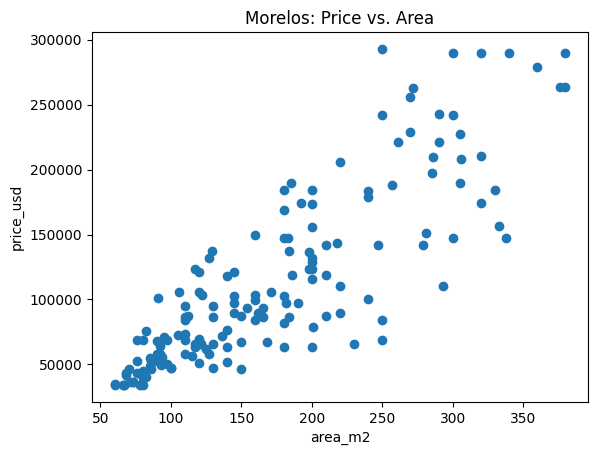

In [ ]:
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])
plt.xlabel("area_m2")
plt.ylabel("price_usd")
plt.title("Morelos: Price vs. Area");

In [ ]:
df_mexico_city = df[df["state"] == "Distrito Federal"]
#df_mexico_city.head()


In [ ]:
p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])
print(p_correlation)

0.34365463691382664


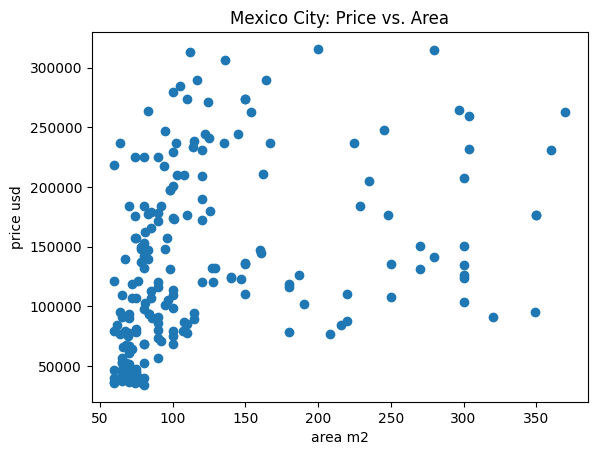

In [ ]:
#df_mexico_city.head()
plt.scatter(x=df_mexico_city["area_m2"], y=df_mexico_city["price_usd"])
plt.xlabel("area m2")
plt.ylabel("price usd")
plt.title("Mexico City: Price vs. Area");


In [ ]:
df["property_type"].unique()
df_1 = df["property_type"].replace({'house': '1', 'apartment':'2'})